In [1]:
import os 

In [2]:
os.getcwd()

'C:\\Users\\al2790'

In [3]:
os.chdir('E:\Workings\emergency_classification')

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
#from skimage.io import imread, imshow

In [8]:
image = plt.imread("E:/Workings/emergency_classification/images/1.JPG")

In [9]:
image

array([[[30, 29, 24],
        [21, 20, 15],
        [19, 18, 13],
        ...,
        [17, 13, 10],
        [16, 12,  9],
        [15, 11,  8]],

       [[26, 25, 20],
        [19, 18, 13],
        [17, 16, 11],
        ...,
        [16, 12,  9],
        [14, 10,  7],
        [11,  7,  4]],

       [[23, 23, 15],
        [17, 16, 11],
        [16, 15, 10],
        ...,
        [13,  9,  6],
        [13,  9,  6],
        [13,  9,  6]],

       ...,

       [[70, 75, 78],
        [69, 74, 77],
        [70, 75, 78],
        ...,
        [39, 43, 46],
        [37, 41, 44],
        [34, 38, 41]],

       [[68, 73, 76],
        [68, 73, 76],
        [69, 74, 77],
        ...,
        [37, 41, 44],
        [37, 41, 44],
        [37, 41, 44]],

       [[73, 78, 81],
        [73, 78, 81],
        [75, 80, 83],
        ...,
        [30, 34, 37],
        [33, 37, 40],
        [37, 41, 44]]], dtype=uint8)

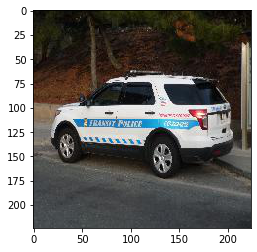

In [10]:
plt.imshow(image)

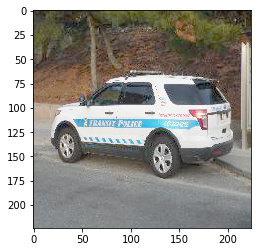

In [11]:
from skimage.exposure import adjust_gamma
plt.imshow(adjust_gamma(image,0.5))

In [12]:
from glob import glob

In [13]:
images= glob("E:/Workings/emergency_classification/images/*.JPG")

In [14]:
images

['E:/Workings/emergency_classification/images\\0.jpg',
 'E:/Workings/emergency_classification/images\\1.jpg',
 'E:/Workings/emergency_classification/images\\10.jpg',
 'E:/Workings/emergency_classification/images\\100.jpg',
 'E:/Workings/emergency_classification/images\\1000.jpg',
 'E:/Workings/emergency_classification/images\\1001.jpg',
 'E:/Workings/emergency_classification/images\\1002.jpg',
 'E:/Workings/emergency_classification/images\\1003.jpg',
 'E:/Workings/emergency_classification/images\\1004.jpg',
 'E:/Workings/emergency_classification/images\\1005.jpg',
 'E:/Workings/emergency_classification/images\\1006.jpg',
 'E:/Workings/emergency_classification/images\\1007.jpg',
 'E:/Workings/emergency_classification/images\\1008.jpg',
 'E:/Workings/emergency_classification/images\\1009.jpg',
 'E:/Workings/emergency_classification/images\\101.jpg',
 'E:/Workings/emergency_classification/images\\1010.jpg',
 'E:/Workings/emergency_classification/images\\1011.jpg',
 'E:/Workings/emergency_

In [15]:
rng= np.random.RandomState()

In [16]:
rng.choice(images)

'E:/Workings/emergency_classification/images\\1768.jpg'

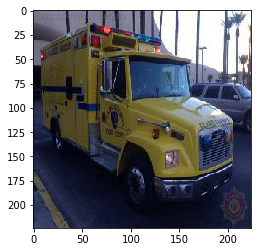

In [17]:
img_rng=rng.choice(images)
img=plt.imread(img_rng)
plt.imshow(img)

In [18]:
import pandas as pd

In [19]:
data=pd.read_csv('data.csv')

In [20]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [21]:
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [22]:
data['emergency_or_not'].value_counts()/len(data['emergency_or_not'])*100

0    57.865646
1    42.134354
Name: emergency_or_not, dtype: float64

this is an emergency vehicle


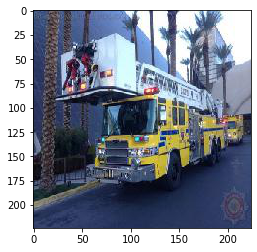

In [24]:
# randomly select any row from the data 

row_index= rng.choice(data.index)


# pick the name of the image and combine the path 

img_name=data.iloc[row_index]['image_names']

#read and plot the image 

img= plt.imread('E:/Workings/emergency_classification/images/'+img_name)
plt.imshow(img)

#pick out the class from the target for the corresponding image 

target= data.iloc[row_index]['emergency_or_not']

#print the class of the vehicle
if target==1:
    print( 'this is an emergency vehicle')
else:
    print ('It is not Emergency vehicle')

In [26]:
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

In [27]:
# seed : It initializes the pseudorandom number generator. You should call it before generating the random number. 
#If you use the same seed to initialize

seed=42
rng=np.random.RandomState(seed)

In [28]:
data=pd.read_csv('data.csv')

In [31]:
x=[]
for img_name in data.image_names:
    img= plt.imread('E:/Workings/emergency_classification/images/'+img_name)
    x.append(img)
    
x=np.array(x)

y=data.emergency_or_not.values

In [32]:
x=x.reshape(2352, 224*224*3) #changing the shape to make sure the data should have in single, SO NN might take it as input

In [35]:
x=x/x.max() # bring the range to {0,1}

In [34]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.3,random_state=seed)

In [36]:
model=Sequential()

model.add(Dense(100,input_dim=224*224*3,activation='sigmoid'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [38]:
#train model on training data 
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_valid,y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 9s 5ms/step - loss: 0.7873 - accuracy: 0.5717 - val_loss: 0.6535 - val_accuracy: 0.6048
Epoch 2/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6413 - accuracy: 0.6446 - val_loss: 0.6472 - val_accuracy: 0.6062
Epoch 3/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6258 - accuracy: 0.6616 - val_loss: 0.6255 - val_accuracy: 0.6445
Epoch 4/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6148 - accuracy: 0.6701 - val_loss: 0.6363 - val_accuracy: 0.6388
Epoch 5/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6127 - accuracy: 0.6659 - val_loss: 0.6205 - val_accuracy: 0.6544
Epoch 6/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6087 - accuracy: 0.6762 - val_loss: 0.5890 - val_accuracy: 0.6941
Epoch 7/10
1646/1646 [===================

In [39]:
#get predictions 

predictions = model.predict_classes(x_valid)[:,0]
predictions_probabilities = model.predict(x_valid)[:,0]


In [41]:
# pull out the original images from the data which corresponds to validation data 
_,valid_vehicles,_, valid_y=train_test_split(data.image_names.values,y,test_size=0.3,random_state=seed)

In [43]:

#get a random index to plot image randomly

index= rng.choice(range(len(valid_vehicles)))

index

435

In [45]:
#get the corresponding image name and prob

img_name=valid_vehicles[index]
img_name

prob=(predictions_probabilities*100).astype(int)[index]

In [46]:
#read the image

img=plt.imread("E:/Workings/emergency_classification/images/"+img_name)

In [47]:
#print the prob and actual class

print(prob,'% sure that it is emergency')

print('whereas actual class is',valid_y[index])



78 % sure that it is emergency
whereas actual class is 1


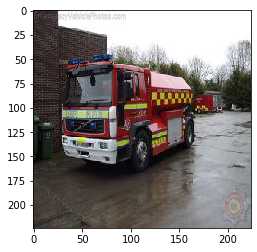

In [48]:
#plot the image

plt.imshow(img)

In [49]:
incorrect_indices= np.where(predictions !=y_valid)[0]

In [50]:
len(incorrect_indices),predictions.shape

(211, (706,))

In [51]:
img=plt.imread("E:/Workings/emergency_classification/images/"+img_name)



In [52]:
print(prob,'% sure that it is emergency')

print('whereas actual class is',valid_y[index])

78 % sure that it is emergency
whereas actual class is 1
